# Predictive Models

Standard Algorithms chosen:
-  Logistic Regression
-  Linear Discriminant Analysis
-  K-Nearest Neighbors
-  Naive Bayes
-  Support Vector Machines

Ensemble Algorithms chosen:
-  Adaboost
-  Gradient Boosted Decision Tree
-  Random Forest
-  Extremely Randomized Trees 

Goals:
-  Compare standard algorithm performance on unscaled data
-  Compare standard algorithm performance on scaled data
-  Tune parameters of best performing algorithm
-  Compare ensemble methods on scaled data
-  Predict with best model 
-  See if performance can be further improved with further feature selection
-  Tune hyperparameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
df = pd.read_csv('prediction.csv')

In [3]:
df = df.drop(['Unnamed: 0', 'recordId', 'healthCode', 'age', 'gender'], axis=1)
df.head()

,meanXaccel,medianXaccel,stdXaccel,skewXaccel,kurtXaccel,rangeXaccel,variationXaccel,meanYaccel,medianYaccel,stdYaccel,...,rangeYaccel,variationYaccel,meanZaccel,medianZaccel,stdZaccel,skewZaccel,kurtZaccel,rangeZaccel,variationZaccel,professional-diagnosis
0,-0.060817,-0.039582,0.251105,-0.438470,0.141505,1.508230,-4.128884,0.048314,0.021201,0.315285,...,1.895134,6.525710,-0.104390,-0.152150,0.475797,0.726143,0.544279,3.060726,-4.557892,False
1,-0.015293,0.019290,0.205124,-0.854834,1.367009,1.521156,-13.413365,0.050700,0.029125,0.267536,...,1.910760,5.276845,-0.009990,0.011845,0.388474,0.143198,0.936114,3.061306,-38.884676,False
2,0.013353,0.023553,0.206104,-0.969447,4.550264,2.571121,15.434469,0.047635,0.020974,0.230869,...,2.653296,4.846593,-0.098005,-0.091900,0.420515,-1.091197,7.715927,5.277242,-4.290775,False
3,0.016124,0.023198,0.192878,-0.936322,4.949377,2.571121,11.962509,0.056733,0.024706,0.226478,...,2.653296,3.992016,-0.068101,-0.036225,0.425813,-1.372953,7.632989,5.277242,-6.252671,False
4,0.013815,0.019293,0.198090,-0.664648,4.381479,2.674647,14.338761,0.048095,0.019794,0.246758,...,3.030658,5.130650,-0.057569,-0.030008,0.396042,-1.491347,9.065509,5.277242,-6.879401,False


In [4]:
# split out into train and test

array = df.values

X = array[:,0:21].astype(float)
y = array[:,21].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Standard Algorithms

We turn our attention to classification. Classification tries to predict, which of a small set of classes, an observation belongs to. Mathematically, the aim is to find  $y$ , a label based on knowing a feature vector  $x$ . In the context of this data we have a binary classification problem where  $y$  has only two classes: a positive diagnosis of Parkinson's Disease (1) and a negative diagnosis of Parkison's Disease (0). 5 popular algorithms for binary classification are Logistic Regression, Linear Discriminant Analysis, K-Nearest Neighbors, Naive Bayes Classification, and Support Vector Machines.

Let's get into a description of the 5 algorithms below:

## Logistic Regression 

Logistic regression is one of the go-to models used for binary classification and is known as a discriminative classifier. The goal is to draw a line in feature space that divides the 1 samples from the 0 samples. In other words, we wish to find the line which divides the samples. A line has the form $w_1 x_1 + w_2 x_2 + w_0 = 0$ in 2-dimensions.

$$w_1 x_1 + w_2 x_2 + w_0 \ge 0,$$

and on the other side we have 

$$w_1 x_1 + w_2 x_2 + w_0 < 0.$$ 

Our classification rule then becomes:

\begin{eqnarray*}
y = 1 & \ if & {w}\cdot\ {x} \ge 0\\
y = 0 & \ if & {w}\cdot\ {x} < 0
\end{eqnarray*}

where ${x}$ is the vector $\{1,x_1, x_2,...,x_n\}$ where we have our features - in the context of this data those features are the columns in our dataframe such as the three axis acceleration variables. 

To achieve this we use the sigmoid function:

$$h(z) = \frac{1}{1 + e^{-z}}.$$

We can then identify that $z = {w}\cdot\ {x}$ ,where $z=0$ this function has the value 0.5. If $z > 0$, $h > 0.5$ and as $z \to \infty$, $h \to 1$. If $z < 0$, $h < 0.5$ and as $z \to -\infty$, $h \to 0$. 

## K-Nearest Neighbors 

The intuition behind K-Nearest Neighbors(kNN) is that samples close to each other in feature-space share a label. In other words: if a lot of samples in some area of the feature space belong to one class (positive diagnosis) as compared to the other (negative diagnosis), we'll label that part of the feature space as belonging to that class. For a binary classification problem such as ours, this process will then classify the feature space into two class-based regions. Then, given the point in feature space, we find which region its in and its class.

KNN does this by scanning for the k nearest neighbors in the training set of the new sample. Before scanning, we must define a distance in the feature space to define which neighbors are "close". This distance is typically defined as the Euclidean distance, the sum of the square of the difference of each feature value between any two samples.

$$D(s_1,s_2) = \sum_f (x_{f1} - x_{f2})^2.$$

In the context of our problem which is binary classification, an alternative distance metric that we could use is the Hamming distance.

## Decision Trees

In this problem above we want to be able to classify positively diagnosed patients from negatively diagnosed patients using our axis acceleration features. These are all continuous variables and we also have an observed label $Y_i$ for each class, 1 and 0. 

-  At each step of the algorithm we consider a list of possible decision (or split), for example kurtXaccel > 0.5
-  For each possible decision we recalculate the predictor for that rule, for example $\hat{Y}_i = 1$ if kurtXaccel > 0.5 and $0$ otherwise.
- We recalculate the loss for each possible decision: $1/m \sum_{i=1} {L(h(x), y)}$
- We choose the decision that reduces the loss by the largest amount

The common fault of decision trees is that they have poor predictive power. Most tend to overfit the training data and have difficulty predicting on unseen data due to its lack of flexibility.

## Naive Bayes

From Bayes' Theorem, we have that

$$P(c \vert f) \propto P(f \vert c) P(c) $$

$P(c)$ is called the *prior* and is simply the probability of seeing class $c$. $P(f \vert c)$ is the probability that we see feature set $f$ given that this patient is actually in class $c$. This is called the likelihood and comes from the data. One of the  assumptions of the Naive Bayes model is that the features are conditionally independent given the class. Conditional independence means that the presence of that term is independent of all the other patients that appear within that class. If two events are independent, then:

$$P(A \cap B) = P(A) \cdot P(B)$$

conditional independence implies

$$P(f \vert c)  = \prod_i P(f_i | c) $$

where $f_i$ is an individual feature. To make a classification, we then choose the class $c$ such that $P(c \vert f)$ is maximal. This model typically works better with categorical features as opposed to our features which our numerical.

## Linear Discriminant Analysis

Linear Discriminant Analysis (LDA) makes predictions by estimating the probability that a new set of inputs belongs to each class. The class that gets the highest probability is the output class and a prediction is made.  LDA also uses Bayes' theorem to compute the probability.  

In comparison with linear regression, the former tries to fit a line through the data points in an n-dimensional plane, such that the distances between the points and the line is minimized. In LDA, the task is to maximize the distance between the discrminating boundary or the discriminating line to the data points on either side of the line and minimize the distances between the points themselves.

An key issue is that LDA can generate only c or less, number of features, where C is the number of classes. In our problem we have 21 features and only 2 classes. LDA will have to reduce to 2 axis and this reduction could lead to loss of information, which could cause a low classification accuracy.

## Support Vector Machines

A Support Vector Machine (SVM) is a form of a linear discriminant classifier defined by a separating hyperplane. In the context of this problem, given our labeled training data, the algorithm outputs an optimal hyperplane which categorizes new examples into positively diagnosed patients and negatively diagnosed patients. It finds the widest possible margin such that there might be points touching the boundary, these points are called the support vectors. SVM is also known as maximum margin classifier. SVM is a powerful binary classifier due to its ability to capture nonlinearity by projecting the data into a higher dimension using a kernel trick.

## Raw Data Algorithm Performance

In [5]:
num_folds=10
seed=7
scoring='accuracy'

models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.787102 (0.034381)
LDA: 0.799474 (0.024706)
KN: 0.839190 (0.031147)
CART: 0.925142 (0.016253)
NB: 0.706345 (0.027344)
SVM: 0.809239 (0.029441)


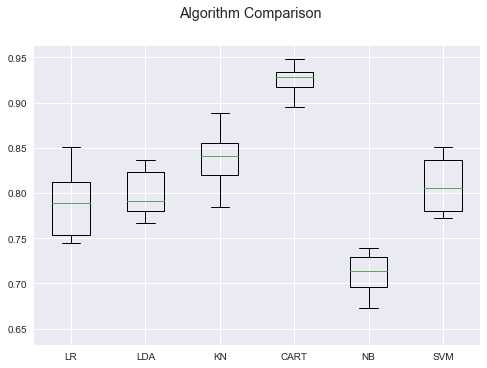

In [6]:
# Visualize comparisons with box plot

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From the initial results it is not suprising the Naive Bayes Classifier had the poorest performance and that Logistic Regression and LDA had a similar performance. Looking at the results it appears that the differing distributions of the raw data could be impacting the performance of KNN which assumes a gaussian distribution. Let's scale the data and observe performance again.

## Scaled Algorithm Performance

In [7]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKN', Pipeline([('Scaler', StandardScaler()), ('KN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

scaled_results = []
scaled_names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    scaled_results.append(cv_results)
    scaled_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.805331 (0.035087)
ScaledLDA: 0.799474 (0.024706)
ScaledKN: 0.922549 (0.013685)
ScaledCART: 0.930345 (0.014232)
ScaledNB: 0.686164 (0.030245)
ScaledSVM: 0.792942 (0.031660)


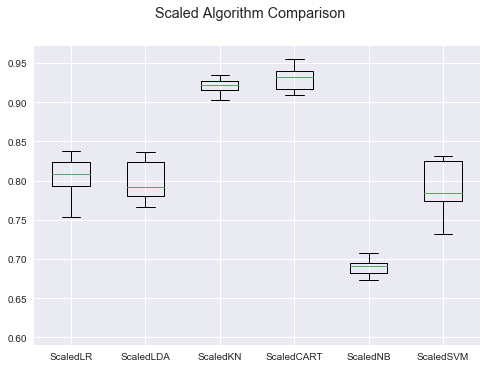

In [8]:
# Compare Algorithms

fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(scaled_results)
ax.set_xticklabels(scaled_names)
plt.show()

As expected, the performance of KNN was greatly improved. It appears that KNN and our Decision Tree classifier were the top performers, let's see if we can tune the parameters of both to get optimize and see which performs the best. An obvious parameter to tune for KNN is the number of neighbors, the default used is 7. We will observe different values of k, avoiding even numbers to make sure there are no ties. For the decision tree we can observe what the optimal depth is for the tree and the minimum number of samples required to be at a leaf node.

## Tuning K-Nearest Neighbors

In [9]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model=KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, std, param))

Best: 0.942057 using {'n_neighbors': 1}
0.942057 (0.021961) with: {'n_neighbors': 1}
0.936198 (0.024091) with: {'n_neighbors': 3}
0.923177 (0.015784) with: {'n_neighbors': 5}
0.913411 (0.023434) with: {'n_neighbors': 7}
0.904948 (0.022905) with: {'n_neighbors': 9}
0.899089 (0.023290) with: {'n_neighbors': 11}
0.903646 (0.023321) with: {'n_neighbors': 13}
0.902344 (0.024620) with: {'n_neighbors': 15}
0.898438 (0.027718) with: {'n_neighbors': 17}
0.893229 (0.028330) with: {'n_neighbors': 19}
0.889323 (0.033507) with: {'n_neighbors': 21}


## Tune Decision Tree

In [10]:
parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}
model=DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=parameters, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, std, param))

Best: 0.899740 using {'min_samples_leaf': 2, 'max_depth': 7}
0.701823 (0.050696) with: {'min_samples_leaf': 1, 'max_depth': 1}
0.701823 (0.050696) with: {'min_samples_leaf': 2, 'max_depth': 1}
0.701823 (0.050696) with: {'min_samples_leaf': 3, 'max_depth': 1}
0.701823 (0.050696) with: {'min_samples_leaf': 4, 'max_depth': 1}
0.701823 (0.050696) with: {'min_samples_leaf': 5, 'max_depth': 1}
0.701823 (0.050696) with: {'min_samples_leaf': 6, 'max_depth': 1}
0.775391 (0.034203) with: {'min_samples_leaf': 1, 'max_depth': 2}
0.775391 (0.034203) with: {'min_samples_leaf': 2, 'max_depth': 2}
0.775391 (0.034203) with: {'min_samples_leaf': 3, 'max_depth': 2}
0.775391 (0.034203) with: {'min_samples_leaf': 4, 'max_depth': 2}
0.775391 (0.034203) with: {'min_samples_leaf': 5, 'max_depth': 2}
0.775391 (0.034203) with: {'min_samples_leaf': 6, 'max_depth': 2}
0.837240 (0.031339) with: {'min_samples_leaf': 1, 'max_depth': 3}
0.837240 (0.031339) with: {'min_samples_leaf': 2, 'max_depth': 3}
0.837240 (0.031

K-Nearest neighbors appears to be the top performer out of the standard algorithms. Let's see if we can improve performance even further by incorporating ensemble methods.

## Ensemble Algorithms

An ensemble is a supervised learning technique for combining multiple weak learners/ models to produce a much stronger model. The four algorithms I chose were AdaBoost classifier, Gradient Boosted Decision Tree, Random Forest, and Extremely Randomized Trees.

The first two ensemble methods use an ensemble technique called boosting and the last two use an ensemble technique called bagging. Let's get into a description of each and then observe which form of ensemble will perform the best.

## AdaBoost

AdaBoost is short for Adaptive Boosting. First you have some base classifier, like a Decision tree for example. 

First you assign to each of your n data points a weight of $w_i = 1/n$, then:

1. fit that classifier (e.g. tree) on all your data, weighted by $w_i$
2. test to see how well your classifier predicts your data
3. data points that are miss-classified get a slightly higher weight

In step 1, the way this weighting is done is by considering a weighted loss. This is some number that is large when $y_i$ is correctly classified and small otherwise.

What this means is that every successive classifier (tree) puts more emphasis on classifying data points that the previous classifier missed. In this way each classifier can concentrate on a subset of the data.

## Gradient Boosted Decision Trees

Gradient Boosted Decision Trees use the same theory as described in AdaBoost. The distinction lies in the weight assignment. When the loss is being calculated, the gradient of that loss is then used to update the weights as opposed to whether or not the prediction was correctly classified in Adaboost. It can be viewed as a more quantitative boosting method.

## Random Forest

Random forest works by aggregating the results from several different randomly created decision trees constructed to explain the data.

To perform this it uses a tool called bootstrap aggregation. To describe bootstrap let's first get into bagging. In tree bagging we do the following $b$ times:

1. Take a random subsample of our data
2. Build a classification tree 
3. repeat

For a new data point we can then simply run that point through all the $b$ trees constructed, get all the decisions $\hat{Y}_1,..., \hat{Y}_b$ and take a majority vote. This form of averaging gets rid of some of the over-fitting issues found in just using one tree. However, fitting these trees costs a lot computationally and is not ideal if our dataset was much larger.

This method is very similar to the bootstrap aggregation method. The variation is that the trees that are built from the random subsample of our data are quite similar. In Random Forests we do the following $b$ times:

1. Take a random subsample of your data
2. Select m variables at random out of all M possible variables (independently for each node).
3. Find the best split on the selected m variables. Build out the entire tree.
4. repeat

## Extremely Randomized Trees

As in random forests, a random subset of candidate features is used, but instead of looking for the best splits, splits are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias.

In [11]:
# ensemble methods - bagging and boosting
# boosting - AdaBoost and GradientBoosting
# bagging - Random Forests and Extra Trees

ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

ensemble_results = []
ensemble_names = []

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    ensemble_results.append(cv_results)
    ensemble_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

AB: 0.883461 (0.032829)
GBM: 0.927710 (0.025206)
RF: 0.942726 (0.027097)
ET: 0.944054 (0.024823)


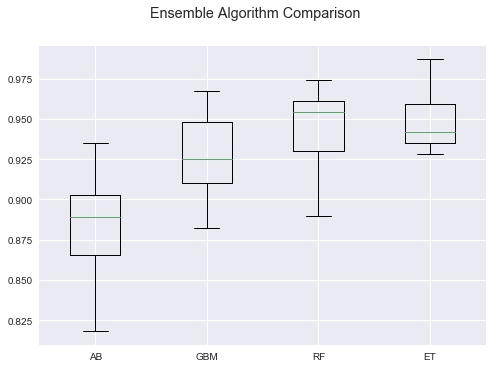

In [12]:
# bagging works better than boosting

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(ensemble_results)
ax.set_xticklabels(ensemble_names)
plt.show()

Looking at our results it appears that the two bagging algorithms seem to outperform the boosting algorithms. Let's now evaluate our top performing model which seems to be Extremely Randomized Decision Trees.

# Performance Evaluation

The two performance metrics that I chose to evaluate the performance of our model are the confusion matrix and precision recall. These two are commonly used in classification problems.

## Confusion Matrix

In a confusion matrix each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class. In the context of this problem a true positive represents a patient that was labeled positive and also being diagnosed as positive for Parkinsons's Disease. A true negative represents a patient that was labeled negative and was diagnosed as negative. A false positive represents a patient that was labeled positive but was diagnosed as negative, and a false negative represents a patient that was labeled negative but was diagnosed as positive.

## Precision Recall 

The recall (also the true positive rate) is the ratio of true positive guesses among all positives:
$$\text{recall} = \frac{TP}{P}=\frac{TP}{TP+FN}.$$
The precision is the ratio of the true positive guesses over all the positive guesses:
$$\text{precision} = \frac{TP}{TP+FP}.$$
Because precision and recall both provide valuable information about the quality of a classifier, we want to combine them into a single score. The F1 score is defined as the harmonic mean of recall and precision:
$$F_1 = \frac{2\times\text{recall}\times\text{precision}}{\text{recall} + \text{precision}}.$$

The harmonic mean of two numbers is closer to the smaller of the two numbers than the standard arithmetic mean. The F1 score tends to favor classifiers that are strong in both precision and recall, rather than classifiers that emphasize one at the cost of the other.

In [13]:
# prepare model

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesClassifier()
model.fit(rescaledX, y_train)

# estimate accuracy on test set

rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.942708333333
[[ 99   9]
 [ 13 263]]
             precision    recall  f1-score   support

          0       0.88      0.92      0.90       108
          1       0.97      0.95      0.96       276

avg / total       0.94      0.94      0.94       384



## Further Feature Selection

We observe a 94% test accuracy with our best model. Remembering the class imbalance that we had where 68% of our patients in the data labeled as true the improvement is decent. However can be possibly improve our prediction performance by only using the top 10 important features from our axis acceleration data?

We can observe this by using the feature_importances attribute from scikit-learn's ExtraTreeClassifier class. We will select the top 10 features and repeat the above protocol to see if we can further improve upon 94% accuracy.

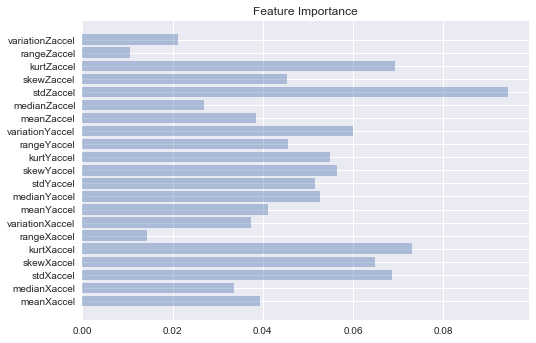

In [14]:
features = [col for col in df.columns if col != 'professional-diagnosis']
y_pos = np.arange(len(features))

plt.barh(y_pos, model.feature_importances_, align='center', alpha=0.4)
plt.yticks(y_pos, features)
plt.title('Feature Importance')

plt.show()

In [15]:
feature_importances = dict(zip(features, model.feature_importances_))
top_10_features = sorted(feature_importances, key=feature_importances.get, reverse=True)[:10]
top_10_feature_df = df.ix[:,df.columns.isin(top_10_features)]
top_10_feature_df['professional-diagnosis'] = df['professional-diagnosis']

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
top_10_feature_df.head()

,stdXaccel,skewXaccel,kurtXaccel,medianYaccel,stdYaccel,skewYaccel,kurtYaccel,variationYaccel,stdZaccel,kurtZaccel,professional-diagnosis
0,0.251105,-0.438470,0.141505,0.021201,0.315285,0.319682,-0.210016,6.525710,0.475797,0.544279,False
1,0.205124,-0.854834,1.367009,0.029125,0.267536,0.547424,1.101485,5.276845,0.388474,0.936114,False
2,0.206104,-0.969447,4.550264,0.020974,0.230869,0.571332,2.337877,4.846593,0.420515,7.715927,False
3,0.192878,-0.936322,4.949377,0.024706,0.226478,0.709988,2.618261,3.992016,0.425813,7.632989,False
4,0.198090,-0.664648,4.381479,0.019794,0.246758,0.681993,3.859799,5.130650,0.396042,9.065509,False


In [17]:
top_10_feature_df.shape

(1920, 11)

In [18]:
array = top_10_feature_df.values

X = array[:,0:10].astype(float)
y = array[:,10].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [19]:
num_folds=10
seed=7
scoring='accuracy'

models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.744763 (0.037703)
LDA: 0.798824 (0.033465)
KN: 0.929043 (0.017059)
CART: 0.941431 (0.020755)
NB: 0.695272 (0.035080)
SVM: 0.835905 (0.032336)


It appears that selecting the top 10 features was able to remove the noisiest features, most likely the features that had erratic distributions. As we can see here the performance of K-Nearest Neighbors on unscaled data has vastly improved.

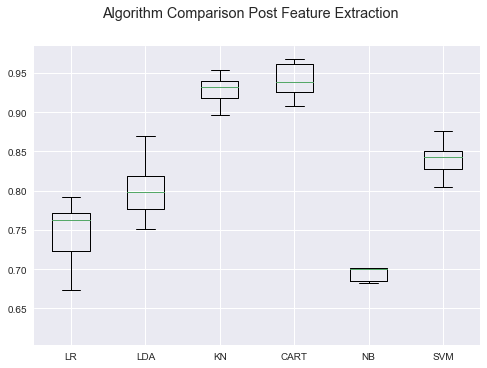

In [20]:
# Visualize comparisons with box plot

fig = plt.figure()
fig.suptitle('Algorithm Comparison Post Feature Extraction')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [21]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKN', Pipeline([('Scaler', StandardScaler()), ('KN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

scaled_results = []
scaled_names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    scaled_results.append(cv_results)
    scaled_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.773432 (0.030183)
ScaledLDA: 0.798824 (0.033465)
ScaledKN: 0.929696 (0.016905)
ScaledCART: 0.942076 (0.021083)
ScaledNB: 0.695272 (0.035080)
ScaledSVM: 0.793613 (0.030197)


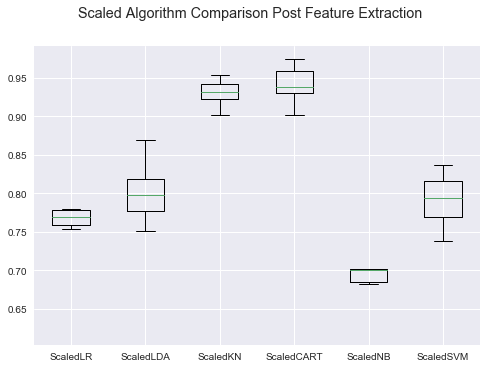

In [22]:
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison Post Feature Extraction')
ax = fig.add_subplot(111)
plt.boxplot(scaled_results)
ax.set_xticklabels(scaled_names)
plt.show()

In [23]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

ensemble_results = []
ensemble_names = []

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    ensemble_results.append(cv_results)
    ensemble_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

AB: 0.889954 (0.029364)
GBM: 0.934233 (0.019016)
RF: 0.942721 (0.020505)
ET: 0.946647 (0.024081)


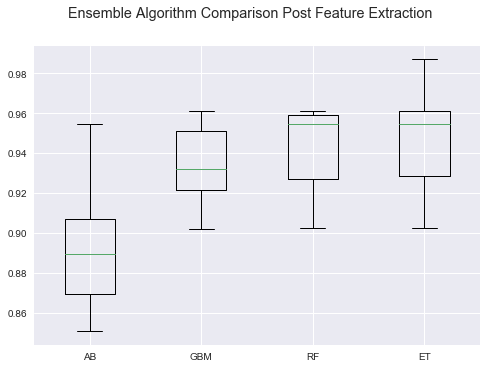

In [24]:
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison Post Feature Extraction')
ax = fig.add_subplot(111)
plt.boxplot(ensemble_results)
ax.set_xticklabels(ensemble_names)
plt.show()

After repeating the procedure with the top 10 selected features, Random Forest was marginally improved to be our top performing model in our training data. Let's see if that translates to success in test data prediction.

In [25]:
# prepare model

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestClassifier()
model.fit(rescaledX, y_train)

# estimate accuracy on test set

rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9375
[[ 99   9]
 [ 15 261]]
             precision    recall  f1-score   support

          0       0.87      0.92      0.89       108
          1       0.97      0.95      0.96       276

avg / total       0.94      0.94      0.94       384



# Hyper Parameter Tuning of ET and GBM

So far we have achieved an accuracy of 94% with an untuned Extremely Randomized Trees classifier. Let's see if we can improve the performance further by hypertuning the parameters. It would also be intriguing to give one of the boosted models a shot at performance improvement by tunings its parameters as well and predicting on the test set. Let's see what hyperparameters we can tune for the Extra Trees and Gradient Boosted Decision Tree classifier.

## GBM Tuning

A few that come to mind are the number of estimators (the number of sequential trees to be modeled), the maximum depth of the tree, and the minimum number of samples (or observations) which are required in a node to be considered for splitting. We can also look at the minimum number of samples required to be at a leaf node and the learning rate for gradient descent to calculate error. With the size of our data not being too large we can afford the computational expenses, however with large amounts of data we could expect more time being spent in grid searching for hyperparameters.

In [29]:
# n_estimators

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=250,min_samples_leaf=50,
                                   max_depth=5,max_features='sqrt',subsample=0.8,random_state=10)

param_test1 = {'n_estimators':range(20,201,10)}

kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_test1, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, std, param))

Best: 0.928385 using {'n_estimators': 200}
0.873698 (0.035236) with: {'n_estimators': 20}
0.893880 (0.036461) with: {'n_estimators': 30}
0.895833 (0.031560) with: {'n_estimators': 40}
0.902995 (0.029807) with: {'n_estimators': 50}
0.907552 (0.027588) with: {'n_estimators': 60}
0.912109 (0.026930) with: {'n_estimators': 70}
0.917318 (0.025534) with: {'n_estimators': 80}
0.917318 (0.024693) with: {'n_estimators': 90}
0.919922 (0.026809) with: {'n_estimators': 100}
0.921224 (0.022959) with: {'n_estimators': 110}
0.920573 (0.024459) with: {'n_estimators': 120}
0.921224 (0.025273) with: {'n_estimators': 130}
0.925130 (0.024719) with: {'n_estimators': 140}
0.924479 (0.026680) with: {'n_estimators': 150}
0.927083 (0.025481) with: {'n_estimators': 160}
0.927734 (0.024583) with: {'n_estimators': 170}
0.926432 (0.025835) with: {'n_estimators': 180}
0.927734 (0.025735) with: {'n_estimators': 190}
0.928385 (0.024669) with: {'n_estimators': 200}


In [30]:
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200,min_samples_leaf=50,
                                max_features='sqrt',subsample=0.8,random_state=10)

param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}

kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_test2, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, std, param))

Best: 0.941406 using {'min_samples_split': 200, 'max_depth': 13}
0.929036 (0.023702) with: {'min_samples_split': 200, 'max_depth': 5}
0.923177 (0.024300) with: {'min_samples_split': 400, 'max_depth': 5}
0.917318 (0.028684) with: {'min_samples_split': 600, 'max_depth': 5}
0.899740 (0.028953) with: {'min_samples_split': 800, 'max_depth': 5}
0.885417 (0.034694) with: {'min_samples_split': 1000, 'max_depth': 5}
0.935547 (0.030006) with: {'min_samples_split': 200, 'max_depth': 7}
0.925130 (0.028401) with: {'min_samples_split': 400, 'max_depth': 7}
0.915365 (0.028364) with: {'min_samples_split': 600, 'max_depth': 7}
0.898438 (0.028794) with: {'min_samples_split': 800, 'max_depth': 7}
0.885417 (0.034694) with: {'min_samples_split': 1000, 'max_depth': 7}
0.940755 (0.027329) with: {'min_samples_split': 200, 'max_depth': 9}
0.929036 (0.024781) with: {'min_samples_split': 400, 'max_depth': 9}
0.919922 (0.027471) with: {'min_samples_split': 600, 'max_depth': 9}
0.898438 (0.028794) with: {'min_samp

In [33]:
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=13,
                                min_samples_split=200,max_features='sqrt',subsample=0.8,random_state=10)

param_test3 = {'min_samples_leaf': range(1,101,10)}

kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_test3, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, std, param))

Best: 0.943359 using {'min_samples_leaf': 41}
0.937500 (0.020006) with: {'min_samples_leaf': 1}
0.940104 (0.024806) with: {'min_samples_leaf': 11}
0.939453 (0.026974) with: {'min_samples_leaf': 21}
0.939453 (0.023265) with: {'min_samples_leaf': 31}
0.943359 (0.023458) with: {'min_samples_leaf': 41}
0.942057 (0.021848) with: {'min_samples_leaf': 51}
0.936198 (0.022508) with: {'min_samples_leaf': 61}
0.934245 (0.027949) with: {'min_samples_leaf': 71}
0.930990 (0.026514) with: {'min_samples_leaf': 81}
0.930339 (0.030552) with: {'min_samples_leaf': 91}


In [35]:
model = GradientBoostingClassifier(n_estimators=200, max_depth=13, min_samples_leaf = 41,
                                min_samples_split=200,max_features='sqrt',subsample=0.8,random_state=10)

param_test5 = {'learning_rate':[0.005, 0.01, 0.05, 0.1]}

kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_test5, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, std, param))

Best: 0.943359 using {'learning_rate': 0.1}
0.866536 (0.032867) with: {'learning_rate': 0.005}
0.900391 (0.031335) with: {'learning_rate': 0.01}
0.927734 (0.023367) with: {'learning_rate': 0.05}
0.943359 (0.023458) with: {'learning_rate': 0.1}


## ET Tuning

We were able to improve the performance of the GBM on the training data to virtually the same performance as the untuned ET by optimizing the minimum number of samples for a node to be split on, the mininum number of leaves to be considered a node, and the maximum depth of the tree.

We can look at the same exact same hyperparameters for our Extra Trees Classifier along with the minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.

In [38]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesClassifier(max_features='sqrt')

param_test1 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}

kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_test1, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, std, param))

Best: 0.826172 using {'min_samples_split': 200, 'max_depth': 13}
0.768880 (0.037006) with: {'min_samples_split': 200, 'max_depth': 5}
0.733073 (0.048864) with: {'min_samples_split': 400, 'max_depth': 5}
0.737630 (0.038262) with: {'min_samples_split': 600, 'max_depth': 5}
0.722656 (0.039855) with: {'min_samples_split': 800, 'max_depth': 5}
0.704427 (0.048650) with: {'min_samples_split': 1000, 'max_depth': 5}
0.791667 (0.025387) with: {'min_samples_split': 200, 'max_depth': 7}
0.774089 (0.036635) with: {'min_samples_split': 400, 'max_depth': 7}
0.743490 (0.030136) with: {'min_samples_split': 600, 'max_depth': 7}
0.714844 (0.044081) with: {'min_samples_split': 800, 'max_depth': 7}
0.708333 (0.037534) with: {'min_samples_split': 1000, 'max_depth': 7}
0.809896 (0.029768) with: {'min_samples_split': 200, 'max_depth': 9}
0.789062 (0.027907) with: {'min_samples_split': 400, 'max_depth': 9}
0.769531 (0.042286) with: {'min_samples_split': 600, 'max_depth': 9}
0.733073 (0.038948) with: {'min_samp

In [45]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesClassifier()

param_test2 = {'min_samples_leaf': range(1,101,10)}

kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_test2, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, std, param))

Best: 0.945312 using {'min_samples_leaf': 1}
0.945312 (0.023629) with: {'min_samples_leaf': 1}
0.891927 (0.033766) with: {'min_samples_leaf': 11}
0.843099 (0.033765) with: {'min_samples_leaf': 21}
0.779297 (0.027040) with: {'min_samples_leaf': 31}
0.744141 (0.046150) with: {'min_samples_leaf': 41}
0.725260 (0.060987) with: {'min_samples_leaf': 51}
0.706380 (0.039397) with: {'min_samples_leaf': 61}
0.703776 (0.051507) with: {'min_samples_leaf': 71}
0.695964 (0.059878) with: {'min_samples_leaf': 81}
0.698568 (0.046336) with: {'min_samples_leaf': 91}


In [44]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesClassifier()

param_test3 = {'min_weight_fraction_leaf':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}

kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_test3, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, std, param))

Best: 0.948568 using {'min_weight_fraction_leaf': 0.0}
0.948568 (0.024719) with: {'min_weight_fraction_leaf': 0.0}
0.669271 (0.032647) with: {'min_weight_fraction_leaf': 0.1}
0.669271 (0.032647) with: {'min_weight_fraction_leaf': 0.2}
0.669271 (0.032647) with: {'min_weight_fraction_leaf': 0.3}
0.669271 (0.032647) with: {'min_weight_fraction_leaf': 0.4}
0.669271 (0.032647) with: {'min_weight_fraction_leaf': 0.5}


Tuning our Extra Trees Classifier did not improve it's performance, it appears that the optimal hyperparameters for this classifier are sci-kit learn's default values. Let's now see how well our tuned Gradient Boosted Decision Tree predicts on our test data. 

In [43]:
# prepare model

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingClassifier(n_estimators=200, max_depth=13, min_samples_leaf = 41,
                                min_samples_split=200,max_features='sqrt',subsample=0.8,random_state=10)
model.fit(rescaledX, y_train)

# estimate accuracy on test set

rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.919270833333
[[ 93  15]
 [ 16 260]]
             precision    recall  f1-score   support

          0       0.85      0.86      0.86       108
          1       0.95      0.94      0.94       276

avg / total       0.92      0.92      0.92       384



## Conclusion and Future Directions

In conclusion, the best test accuracy that we were able to obtain was 94% using the Extremely Randomized Tree Classifier with sci-kit learn's default hyperparameters.

We provided a framework to predict the diagnosis of Parkinson's Disease off of raw walking data that was obtained from the use of patient's accelerometers. This framework appears to work decent at a reasonably small scale of 1920 instances. The next step would be to apply this to the entirety of the data which accounts for about 36,000 patients and will definitely impact the speed of some algorithms that do not scale particularly well such as K-Nearest Neighbors. I intend to download the entirety of the patient data and use this framework to see if the same success can be maintained at a larger scale.